In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 

## First read in weather data from csv file.

In [2]:
df_weather = pd.read_csv('weather_data/Weather.csv')

In [3]:
df_weather.head()

,pickup_datetime,tempm,tempi,dewptm,dewpti,hum,wspdm,wspdi,wgustm,wgusti,...,precipm,precipi,conds,icon,fog,rain,snow,hail,thunder,tornado
0,2015-12-31 00:15:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,...,0.5,0.02,Light Rain,rain,0,1,0,0,0,0
1,2015-12-31 00:42:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,...,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
2,2015-12-31 00:51:00,7.8,46.0,6.1,43.0,89.0,5.6,3.5,NaN,NaN,...,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
3,2015-12-31 01:51:00,7.2,45.0,5.6,42.1,90.0,7.4,4.6,NaN,NaN,...,0.3,0.01,Overcast,cloudy,0,0,0,0,0,0
4,2015-12-31 02:51:00,7.2,45.0,5.6,42.1,90.0,0.0,0.0,NaN,NaN,...,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0


## Keep only the columns that we need (datetime, tempm, precipm, rain, snow)

In [4]:
df_weather.columns

Index(['pickup_datetime', 'tempm', 'tempi', 'dewptm', 'dewpti', 'hum', 'wspdm',
       'wspdi', 'wgustm', 'wgusti', 'wdird', 'wdire', 'vism', 'visi',
       'pressurem', 'pressurei', 'windchillm', 'windchilli', 'heatindexm',
       'heatindexi', 'precipm', 'precipi', 'conds', 'icon', 'fog', 'rain',
       'snow', 'hail', 'thunder', 'tornado'],
      dtype='object')

In [5]:
df_weather = df_weather.drop(columns=['tempi', 'dewptm', 'dewpti', 'hum','wspdm', 'wspdi', 'wgustm', 'wgusti', 'wdird', 'wdire', 
                         'visi', 'pressurem', 'pressurei', 'windchillm', 'windchilli', 'heatindexm', 'heatindexi',
                        'precipi', 'hail', 'thunder', 'tornado', 'conds', 'vism', 'icon', 'fog'])

In [6]:
df_weather.rain.value_counts()

0    9500
1     981
Name: rain, dtype: int64

In [7]:
df_weather.snow.value_counts()

0    10253
1      228
Name: snow, dtype: int64

## Convert the pickup_datetime string to a datetime object

In [8]:
df_weather['pickup_datetime'] = pd.to_datetime(df_weather['pickup_datetime'])

## From checking the head of the dataframe, we can see some items are from the year 2015.  Lets make sure all of our data is from the desired year 2016

In [9]:
df_weather = df_weather[df_weather['pickup_datetime'].dt.year == 2016]

In [10]:
df_weather.head()

,pickup_datetime,tempm,precipm,rain,snow
32,2016-01-01 00:51:00,5.6,NaN,0,0
33,2016-01-01 01:51:00,5.0,NaN,0,0
34,2016-01-01 02:51:00,5.0,NaN,0,0
35,2016-01-01 03:51:00,5.0,NaN,0,0
36,2016-01-01 04:51:00,4.4,NaN,0,0


## Combine the separate rain and snow columns into a single categorical column

In [11]:
#if rain or snow is 1 then precip_type is rain/snow
for i,k in df_weather.iterrows():
    if df_weather.loc[i,'rain'] == 1:
        df_weather.loc[i,'precip_type'] = 'rain'
    elif df_weather.loc[i,'snow'] == 1:
        df_weather.loc[i,'precip_type'] = 'snow'
    else:
        df_weather.loc[i,'precip_type'] = 'clear'

## Drop the rain and snow columns, we won't need them anymore

In [12]:
df_weather = df_weather.drop(columns = ['rain', 'snow'])

## Reset the index 

In [13]:
df_weather = df_weather.reset_index(drop = True)

In [14]:
df_weather.head()

,pickup_datetime,tempm,precipm,precip_type
0,2016-01-01 00:51:00,5.6,NaN,clear
1,2016-01-01 01:51:00,5.0,NaN,clear
2,2016-01-01 02:51:00,5.0,NaN,clear
3,2016-01-01 03:51:00,5.0,NaN,clear
4,2016-01-01 04:51:00,4.4,NaN,clear


## Explore the data further, looking at the rain/snow for different days

In [15]:
df_weather_grouped = df_weather.groupby([df_weather.pickup_datetime.dt.month, df_weather.pickup_datetime.dt.day])

In [16]:
#create a dataframe of how many measurements of each instance were taken
#one column for rain, one for snow, one for nothing
weatherdate = []
raincount = []
snowcount = []
count = []

#iterate through each day as grouped in df_weather_grouped, adding up the instances of rain, snow, and clear
for month, day in df_weather_grouped:
    weatherdate.append(month)
    raincount.append(day.loc[day.precip_type == 'rain', 'precip_type'].count())
    snowcount.append(day.loc[day.precip_type == 'snow', 'precip_type'].count())
    count.append(day.loc[day.precip_type == 'clear', 'precip_type'].count())

    

In [17]:
df_precip_type = pd.DataFrame({'date':weatherdate,'rain':raincount, 'snow':snowcount, 'clear':count})

In [18]:
df_precip_type.head()

,date,rain,snow,clear
0,"(1, 1)",0,0,24
1,"(1, 2)",1,0,23
2,"(1, 3)",0,0,26
3,"(1, 4)",1,0,18
4,"(1, 5)",11,0,28


## Look at the days that it rained

In [19]:
df_rain = df_precip_type[df_precip_type['rain'] != 0]

In [20]:
df_rain_sorted = df_rain.sort_values(by = ['rain'], ascending = False)

In [21]:
df_rain_sorted.head(10)

,date,rain,snow,clear
333,"(11, 29)",40,0,14
54,"(2, 24)",36,0,35
300,"(10, 27)",33,0,16
64,"(3, 5)",33,0,22
319,"(11, 15)",28,0,22
274,"(10, 1)",28,0,18
334,"(11, 30)",27,0,20
210,"(7, 29)",26,0,21
294,"(10, 21)",25,0,38
363,"(12, 29)",24,0,17


### Out of the days that rained, let's choose a few to include in our data set.
### 11/29, 2/24, 10/27, 3/5

## Look at the days that it snowed

In [22]:
df_snow = df_precip_type[df_precip_type['snow'] != 0]

In [23]:
df_snow_sorted = df_snow.sort_values(by = ['snow'], ascending = False)

In [24]:
df_snow_sorted.head(10)

,date,rain,snow,clear
22,"(1, 23)",0,44,1
93,"(4, 3)",0,35,21
122,"(5, 2)",1,24,19
80,"(3, 21)",0,21,20
79,"(3, 20)",0,17,20
214,"(8, 2)",0,15,29
351,"(12, 17)",5,14,22
45,"(2, 15)",11,12,23
275,"(10, 2)",0,8,36
16,"(1, 17)",0,7,27


## Something here does not look right.  According to this table, it snowed on May 2, and August 2, which does not make sense.  I suspect that the days and months have be reversed for some of the datetimes

### Out of the snow days, let's choose a few to include in out data set.
### 1/23, 4/3

## Look at the days with neither rain or snow, ie clear

In [25]:
df_clear = df_precip_type[(df_precip_type['rain'] == 0) & (df_precip_type['snow'] == 0)]

In [26]:
df_clear_sorted = df_clear.sort_values(by = ['clear'], ascending = False)

In [27]:
df_clear_sorted.head(10)

,date,rain,snow,clear
37,"(2, 7)",0,0,71
186,"(7, 5)",0,0,43
69,"(3, 10)",0,0,37
190,"(7, 9)",0,0,35
280,"(10, 7)",0,0,35
125,"(5, 5)",0,0,34
243,"(8, 31)",0,0,33
40,"(2, 10)",0,0,31
100,"(4, 10)",0,0,31
213,"(8, 1)",0,0,31


##  Since some of the snow days don't make sense, let's take a look at the daily temperatures for each month to get a better sense of what is going on with our data.

In [28]:
#plot the daily average temperature for each month
def weatherplot(data):
    #group the data by month
    weather_bymonth = data.groupby(data.pickup_datetime.dt.month)
    plt.figure(figsize = (10,8))
    plt.xticks(range(1,30,1))
    for i in range(1,13):
        #get the month
        tempgroup = weather_bymonth.get_group(i)
        for k in range(1,29):
            #plot the daily mean temperature for the month i
            tempgroup.groupby(tempgroup.pickup_datetime.dt.day).mean().tempm.plot()
    
    plt.grid()
    plt.xlabel('days')
    plt.ylabel('average tempm')
    plt.show()


## From this plot we can see that something does not look right.  The temperature for each month rises and falls in unison before the 12, then spreads out after the 12 (which is more or less what you would expect the temperatures to look like).

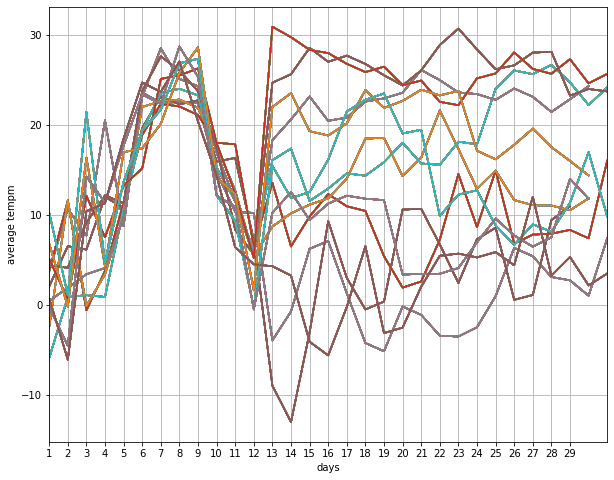

In [29]:
weatherplot(df_weather)

### This more of less confirms our suspicion that the months and days have been flipped for the days before 12.  In order to fix this, we need to set it so that for entries with a day value of less than 12, the values for day and month switch spots.  So the the day becomes the month, and the month becomes the day

In [30]:
df_weather['month'] = df_weather.pickup_datetime.dt.month
df_weather['day'] = df_weather.pickup_datetime.dt.day
df_weather['time'] = df_weather.pickup_datetime.dt.time

In [31]:
#swap the day and month values
for i, k in df_weather.iterrows():
    if df_weather.loc[i,'day'] < 12:
        temp = df_weather.loc[i,'month']
        df_weather.loc[i,'month'] = df_weather.loc[i,'day']
        df_weather.loc[i,'day'] = temp

In [32]:
#check one entry to see the swap
df_weather.loc[1038,:]

pickup_datetime    2016-02-07 00:35:00
tempm                               22
precipm                            NaN
precip_type                      clear
month                                7
day                                  2
time                          00:35:00
Name: 1038, dtype: object

In [33]:
#create a new datetime string out of the correct month and day values
df_weather['new_datetime'] = ['2016-' + str(df_weather.loc[i,'month']) + '-' + str(df_weather.loc[i,'day']) + ' ' 
                              + str(df_weather.loc[i,'time']) for i in range(len(df_weather))]

In [34]:
#check that the new datetime is correct
df_weather.loc[1038,:]

pickup_datetime    2016-02-07 00:35:00
tempm                               22
precipm                            NaN
precip_type                      clear
month                                7
day                                  2
time                          00:35:00
new_datetime         2016-7-2 00:35:00
Name: 1038, dtype: object

In [35]:
#convert the new_datetime string into a datetime object
df_weather['new_datetime'] = pd.to_datetime(df_weather['new_datetime'])

In [36]:
#sort the data by the new_datetime column
df_weather = df_weather.sort_values(by=['new_datetime'], ascending = True)

In [37]:
df_weather.head()

,pickup_datetime,tempm,precipm,precip_type,month,day,time,new_datetime
0,2016-01-01 00:51:00,5.6,NaN,clear,1,1,00:51:00,2016-01-01 00:51:00
1,2016-01-01 01:51:00,5.0,NaN,clear,1,1,01:51:00,2016-01-01 01:51:00
2,2016-01-01 02:51:00,5.0,NaN,clear,1,1,02:51:00,2016-01-01 02:51:00
3,2016-01-01 03:51:00,5.0,NaN,clear,1,1,03:51:00,2016-01-01 03:51:00
4,2016-01-01 04:51:00,4.4,NaN,clear,1,1,04:51:00,2016-01-01 04:51:00


In [38]:
#drop the columns we no longer need since we now have the correct datetime
df_weather.drop(columns = ['pickup_datetime', 'month', 'day', 'time'], inplace = True)

In [39]:
df_weather = df_weather[['new_datetime', 'tempm', 'precipm', 'precip_type']]

In [40]:
df_weather.reset_index(drop = True, inplace = True)

In [41]:
df_weather.rename(columns = {'new_datetime':'pickup_datetime'}, inplace = True)

In [42]:
df_weather.loc[1038,:]

pickup_datetime    2016-02-06 04:51:00
tempm                             -0.6
precipm                            NaN
precip_type                      clear
Name: 1038, dtype: object

In [43]:
df_weather.head()

,pickup_datetime,tempm,precipm,precip_type
0,2016-01-01 00:51:00,5.6,NaN,clear
1,2016-01-01 01:51:00,5.0,NaN,clear
2,2016-01-01 02:51:00,5.0,NaN,clear
3,2016-01-01 03:51:00,5.0,NaN,clear
4,2016-01-01 04:51:00,4.4,NaN,clear


##  With the correct dates now in place, this plot is more or less what we would expect a daily weather plot to look like

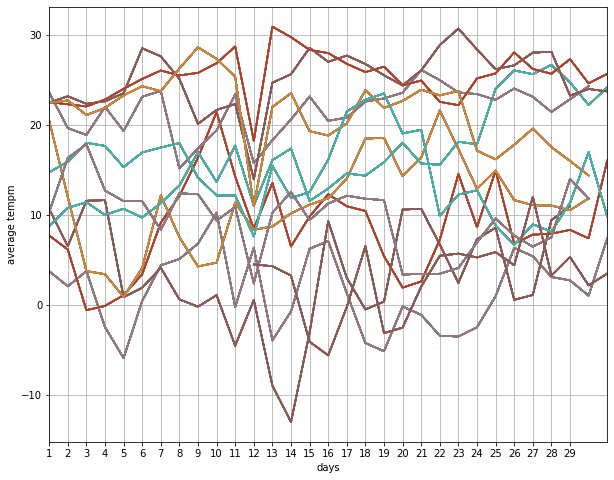

In [44]:
weatherplot(df_weather)

## With the correct dates in place, let's look at the rain, snow, and clear days again

In [45]:
df_weather_grouped = df_weather.groupby([df_weather.pickup_datetime.dt.month, df_weather.pickup_datetime.dt.day])

In [46]:
#create a dataframe of how many measurements of each instance were taken
#one column for rain, one for snow, one for nothing
weatherdate = []
raincount = []
snowcount = []
count = []

#iterate through each day as grouped in df_weather_grouped, adding up the instances of rain, snow, and clear
for month, day in df_weather_grouped:
    weatherdate.append(month)
    raincount.append(day.loc[day.precip_type == 'rain', 'precip_type'].count())
    snowcount.append(day.loc[day.precip_type == 'snow', 'precip_type'].count())
    count.append(day.loc[day.precip_type == 'clear', 'precip_type'].count())

    

In [47]:
df_precip_type = pd.DataFrame({'date':weatherdate,'rain':raincount, 'snow':snowcount, 'clear':count})

In [48]:
df_precip_type.head()

,date,rain,snow,clear
0,"(1, 1)",0,0,24
1,"(1, 2)",0,0,24
2,"(1, 3)",0,0,24
3,"(1, 4)",0,0,22
4,"(1, 5)",0,0,22


## Look at the days that it rained

In [49]:
df_rain = df_precip_type[df_precip_type['rain'] != 0]

In [50]:
df_rain_sorted = df_rain.sort_values(by = ['rain'], ascending = False)

In [51]:
df_rain_sorted.head(10)

,date,rain,snow,clear
333,"(11, 29)",40,0,14
54,"(2, 24)",36,0,35
123,"(5, 3)",33,0,22
300,"(10, 27)",33,0,16
9,"(1, 10)",28,0,18
319,"(11, 15)",28,0,22
334,"(11, 30)",27,0,20
210,"(7, 29)",26,0,21
294,"(10, 21)",25,0,38
211,"(7, 30)",24,0,23


### Out of the days that rained, let's choose a few to include in our data set.
### 11/29, 2/24, 5/3, 10/27

## Look at the days that it snowed

In [52]:
df_snow = df_precip_type[df_precip_type['snow'] != 0]

In [53]:
df_snow_sorted = df_snow.sort_values(by = ['snow'], ascending = False)

In [54]:
df_snow_sorted.head(10)

,date,rain,snow,clear
22,"(1, 23)",0,44,1
63,"(3, 4)",0,35,21
35,"(2, 5)",1,24,19
80,"(3, 21)",0,21,20
79,"(3, 20)",0,17,20
38,"(2, 8)",0,15,29
340,"(12, 17)",5,14,22
45,"(2, 15)",11,12,23
40,"(2, 10)",0,8,36
316,"(11, 12)",0,7,48


### Out of the snow days, let's choose a few to include in out data set.
### Avoid choosing 1/23 since it was a day of extreme blizzards and all the roads were closed.
### 3/4, 2/5, 3/21, 12/17

## Look at the days with neither rain or snow, ie clear

In [55]:
df_clear = df_precip_type[(df_precip_type['rain'] == 0) & (df_precip_type['snow'] == 0)]

In [56]:
df_clear_sorted = df_clear.sort_values(by = ['clear'], ascending = False)

In [57]:
df_clear_sorted.head(10)

,date,rain,snow,clear
183,"(7, 2)",0,0,71
285,"(10, 12)",0,0,52
71,"(3, 12)",0,0,48
42,"(2, 12)",0,0,48
255,"(9, 12)",0,0,48
127,"(5, 7)",0,0,43
276,"(10, 3)",0,0,37
191,"(7, 10)",0,0,35
250,"(9, 7)",0,0,35
125,"(5, 5)",0,0,34


### Choose 7/2, and 9/12

## In summary, this list of days gives us a nice variety of months and seasons to work with
### rain days - 11/29, 2/24, 5/3, 10/27
### snow days - 3/4, 2/5, 3/21, 12/17
### clear days - 7/2, and 9/12

## Using this list of days, we should check that non of them coincided with a major event in the city.  

### Using this list of major parade events in NYC for the year 2016 provided here (https://www.bizbash.com/home/media-gallery/21076886/new-yorks-top-100-events-2016-parades-festivals-holiday-events#image-5c7f40851c74c5dab7c8ee7b), we can make sure to avoid these days in our selection.  Parades and festivals cause an obvious strain on traffic and it's better if we avoid having these circumstances affect the taxi travel times and speeds.

#### 3/17 St Patricks Day Parade
#### 6/1 - 6/5 World Science Festival
#### 6/12 National Puerto Rican Day Parade
#### 6/26 NYC Pride
#### 9/5 New York Caribbean Carnival Parade
#### 11/24 Macy's Thanksgiving Day Parade
#### 11/30 Rocafeller Tree Lighting
#### 12/31 New Years Eve in Time's Square



### Using this list of days, we create a new dataframe consisting only of the weather measurements for the desired days

In [58]:
days = [(11,29), (2,24), (5,3), (10,27), (3,4), (2,5), (3,21), (12,17), (7,2), (9,12)]

In [59]:
#get the desired days from the grouped data
templist = []
for i in days:
    templist.append(df_weather_grouped.get_group(i))

In [60]:
#combine all the days into a single dataframe
df_weather_days = pd.concat(templist)

## Most of the weather readings seem to occur at the 51 min mark for each hour, so we should add last reading of the previous day in case there are taxi trips that occur closer to midnight
### For example, on 11/29, the first reading occurs at 00:51.  If a taxi trip occurs at 00:05 the weather from 11/28 at 23:51 would be preferable as it is closer to the time of the taxi trip.

In [61]:
added_days = []
for i in days:
    x = df_weather_grouped.get_group(i).index.min() - 1
    added_days.append(df_weather.loc[[x]])

In [62]:
df_added_days = pd.concat(added_days)

In [63]:
df_weather_days = df_weather_days.append(df_added_days)

In [64]:
df_weather_days.tail(15)

,pickup_datetime,tempm,precipm,precip_type
7526,2016-09-12 21:51:00,-0.6,NaN,clear
7527,2016-09-12 22:51:00,19.4,NaN,clear
7528,2016-09-12 22:51:00,-0.6,NaN,clear
7529,2016-09-12 23:51:00,-1.1,NaN,clear
7530,2016-09-12 23:51:00,18.9,NaN,clear
9766,2016-11-28 23:51:00,10.6,NaN,clear
1614,2016-02-23 23:51:00,2.2,1.0,clear
3568,2016-05-02 23:51:00,13.9,0.0,rain
8831,2016-10-26 23:51:00,6.7,NaN,clear
1897,2016-03-03 23:51:00,1.7,NaN,clear


In [65]:
#sort the dataframe by pickup_datetime
df_weather_days.sort_values(by=['pickup_datetime'], ascending = True, inplace = True)

In [69]:
df_weather_days.head()

,pickup_datetime,tempm,precipm,precip_type
989,2016-02-04 23:51:00,6.7,0.0,clear
990,2016-02-05 00:51:00,5.0,0.3,clear
991,2016-02-05 01:51:00,4.4,0.0,rain
992,2016-02-05 02:51:00,2.8,0.5,snow
993,2016-02-05 03:40:00,1.7,1.0,snow


In [66]:
df_weather_days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 989 to 10040
Data columns (total 4 columns):
pickup_datetime    540 non-null datetime64[ns]
tempm              540 non-null float64
precipm            303 non-null float64
precip_type        540 non-null object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 21.1+ KB


## Save the dataframe to a csv file

In [67]:
df_weather_days.to_csv('weather_edit.csv', index = False)